# Deep_Learning_from_Scratch_2 - part2

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝2(사이토 고키 지음)을 참고하였습니다. 

## 3. Word2Vec
#### - 추론 기반 기법 : 신경망 활용

### 3.1 추론 기반 기법과 신경망
#### 3.1.1 통계 기반 기법의 문제점
#### - 통계 기반 기법 : 주변 단어의 빈도를 기초로 단어를 표현, 대규모 말뭉치에서 문제 발생
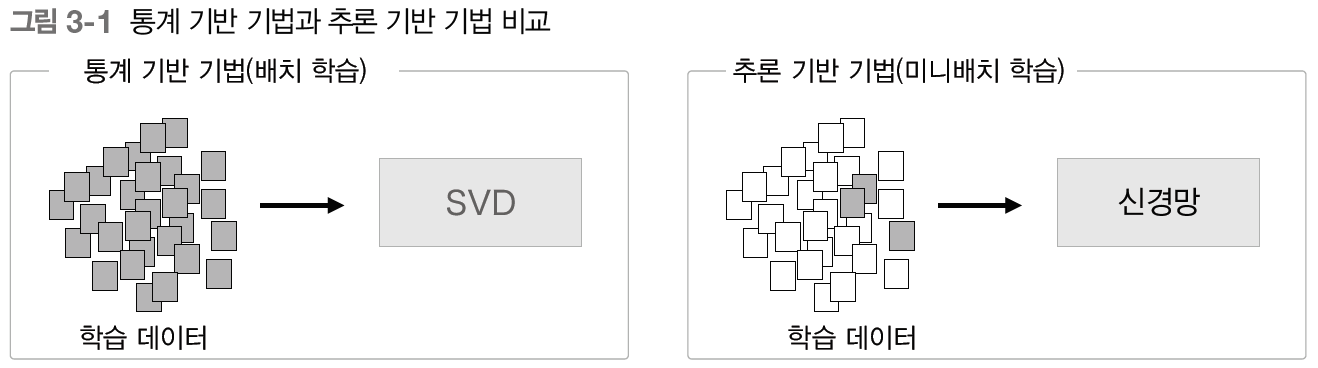

#### 3.1.2 추론 기반 기법 개요
#### - 추론 : 맥락이 주어졌을 때 중심 단얼르 추측하는 작업
#### - 추론 문제를 반복하며 풀면서 단어의 출현 패턴 학습
#### - 추론 기반 기법에서는 모델을 활용 / 모델은 맥락 정보를 입력받아 단어의 출현 확률 출력

#### 3.1.3 신경망에서의 단어 처리
#### - one-hot vector 활용 시 단어를 벡터로 표현할 수 있고 표현된 벡터를 신경망으로 처리 가능 = 단어를 신경망으로 처리
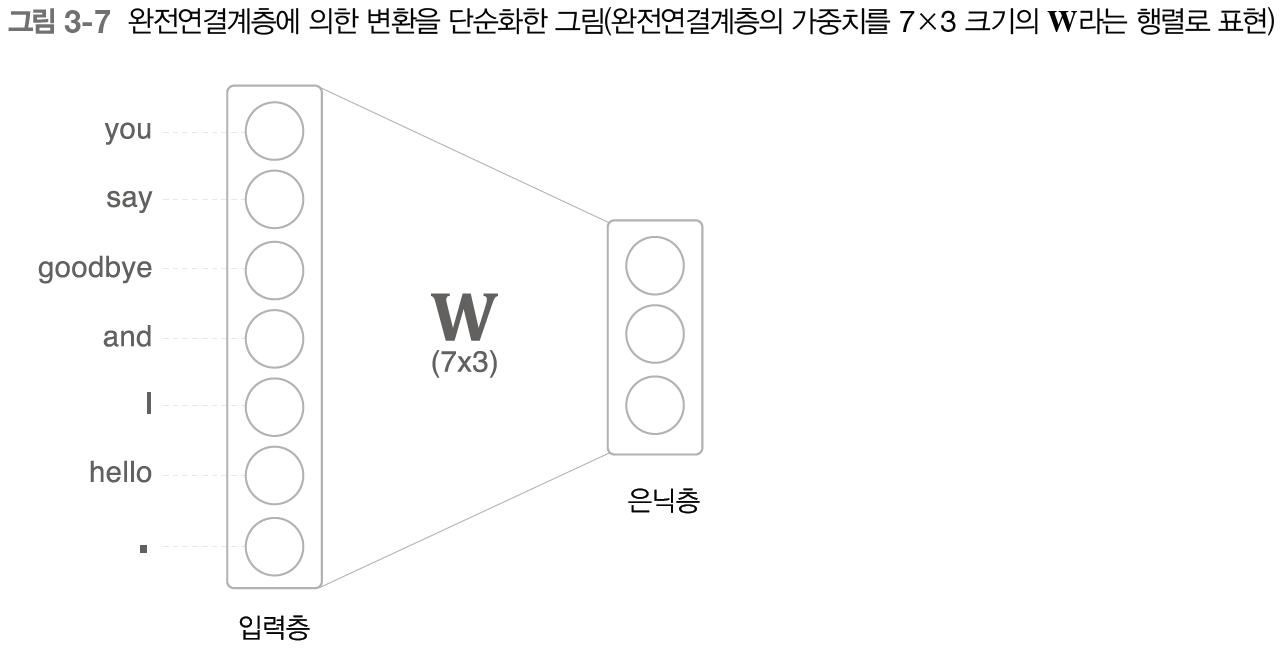

In [21]:
import numpy as np

c = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)
h = np.matmul(c, W)
print(h)

[[-0.446  0.683  0.624]]


### 3.2 단순한 word2vec
#### 3.2.1 CBOW 모델의 추론 처리
#### - CBOW : 맥락으로부터 타깃을 추측
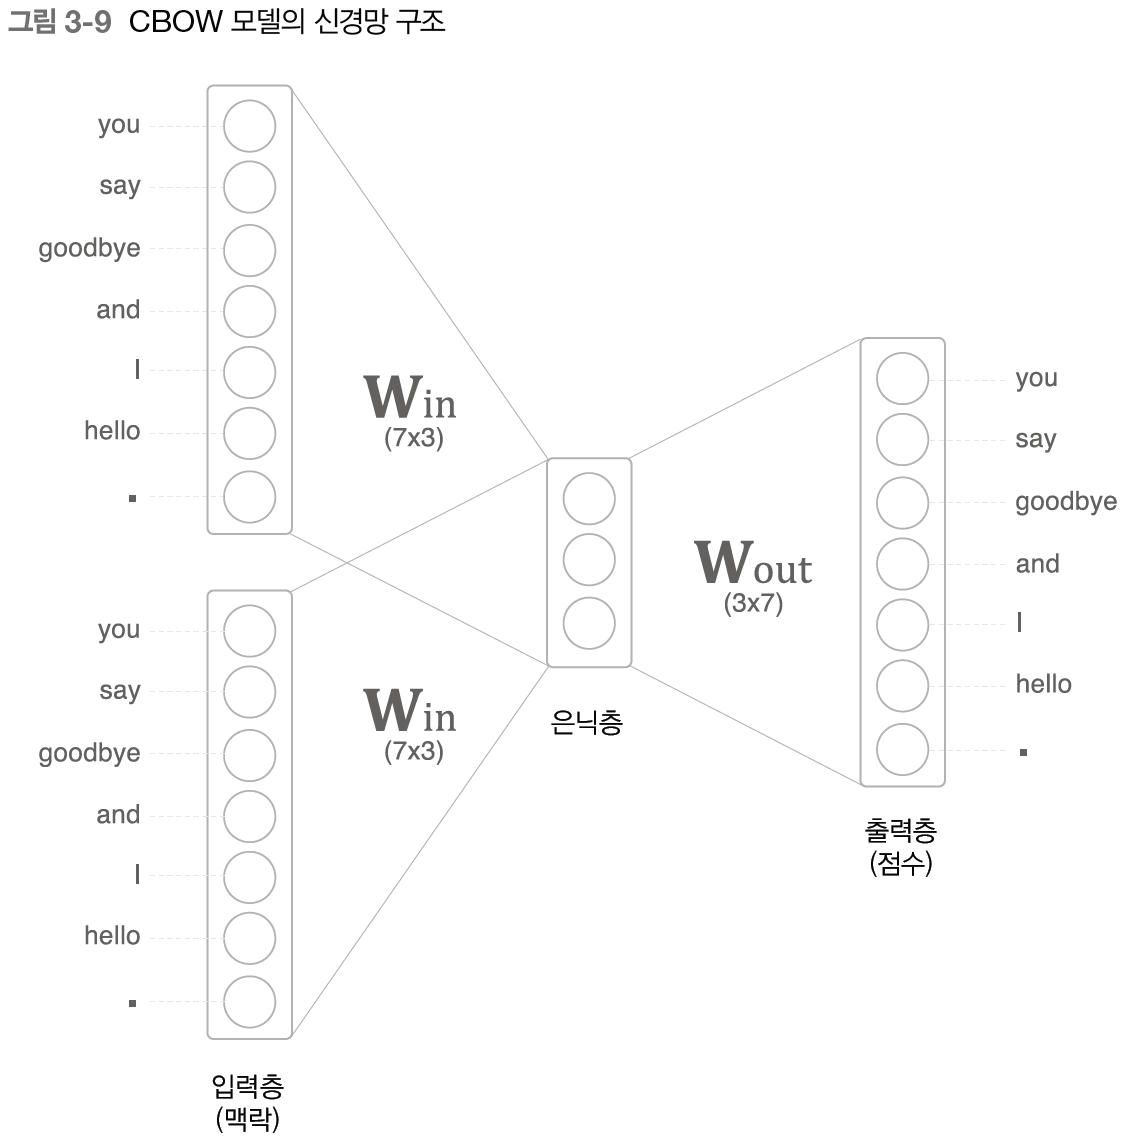
#### - 입력층의 완전연결 은닉층이 단어의 분산표현이 됨 / 학습을 진행할수록 맥락에서 출현하는 단어를 잘 추측하는 방향으로 분산 표현들이 갱신

#### 3.2.2 CBOW 모델의 학습
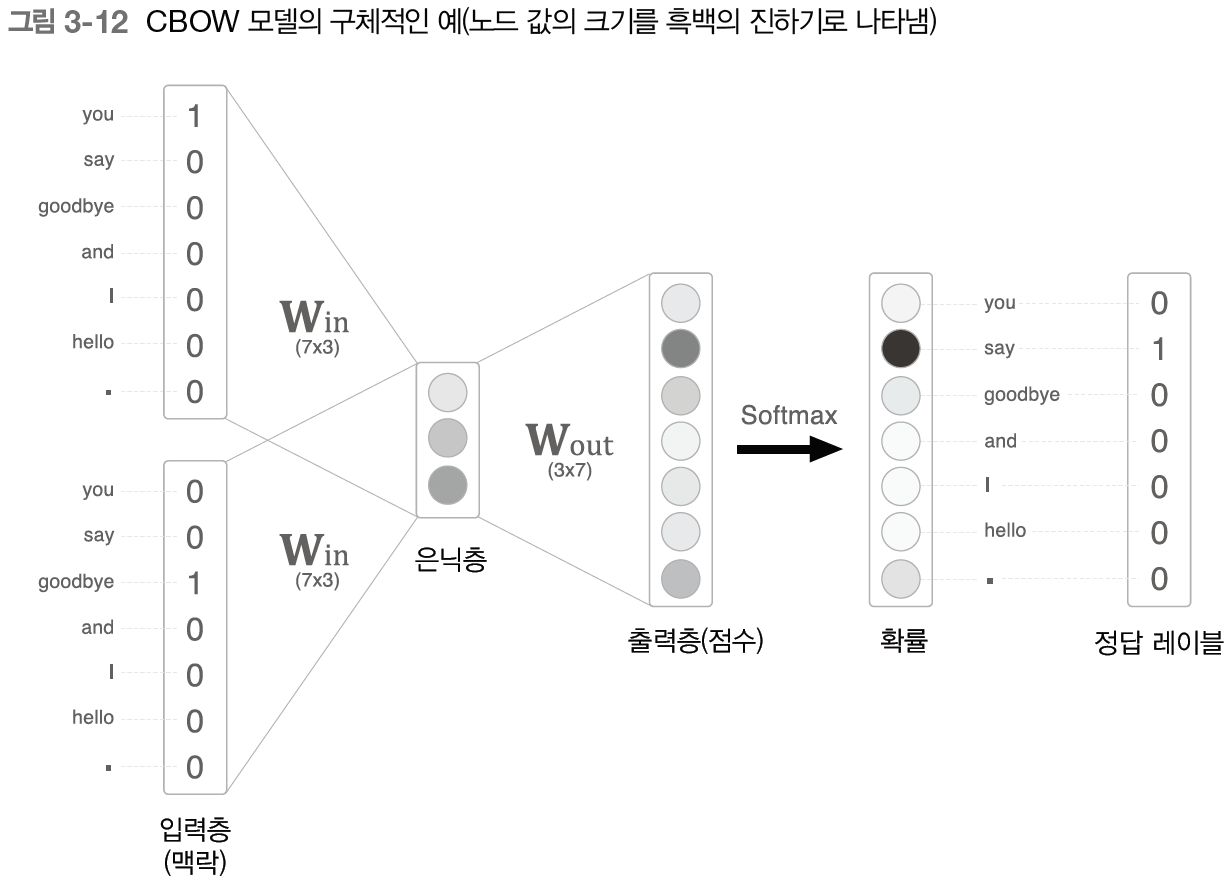
#### - 학습 : 올바른 예측을 할 수 있도록 가중치를 조정 / 단어의 출현 패턴을 파악한 벡터가 학습
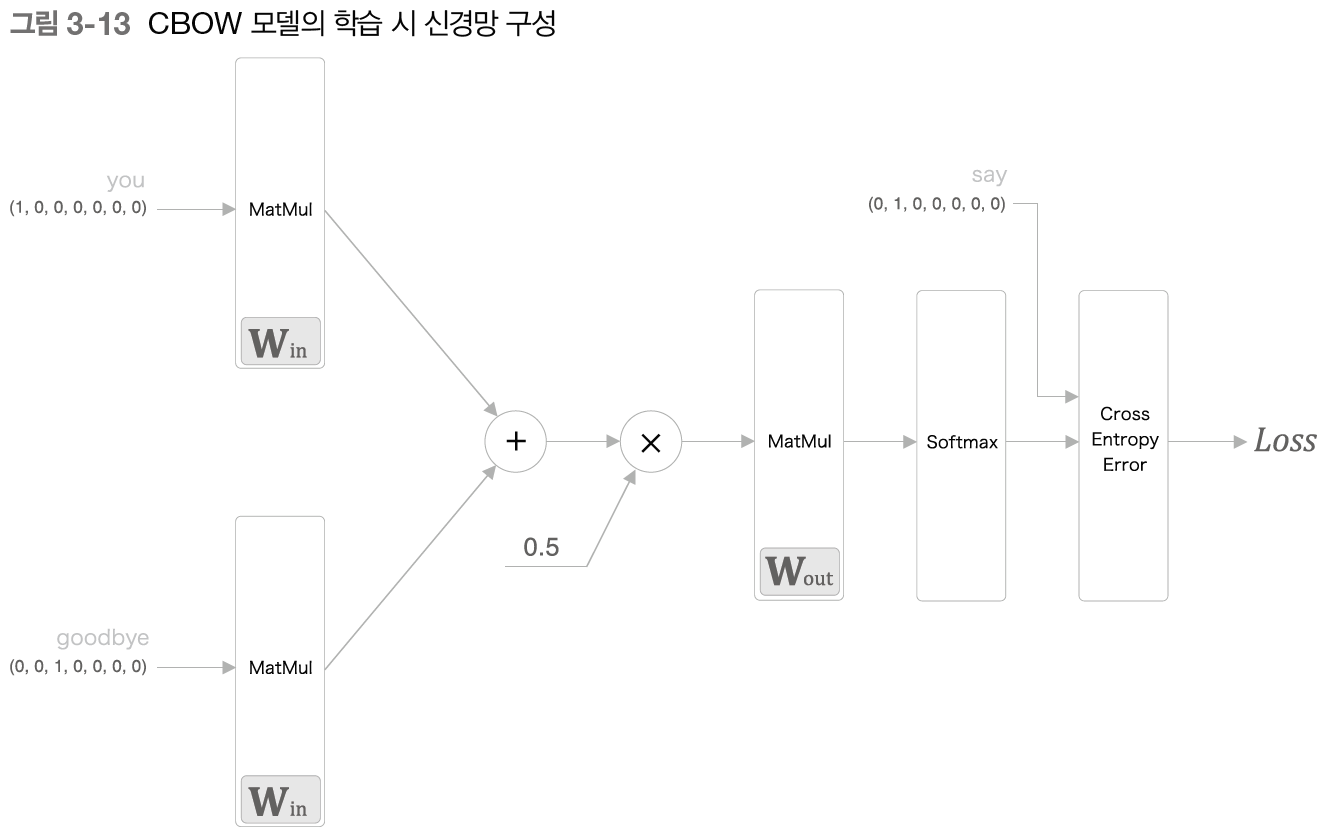
#### - softmax with loss = softmax + cross entropy loss
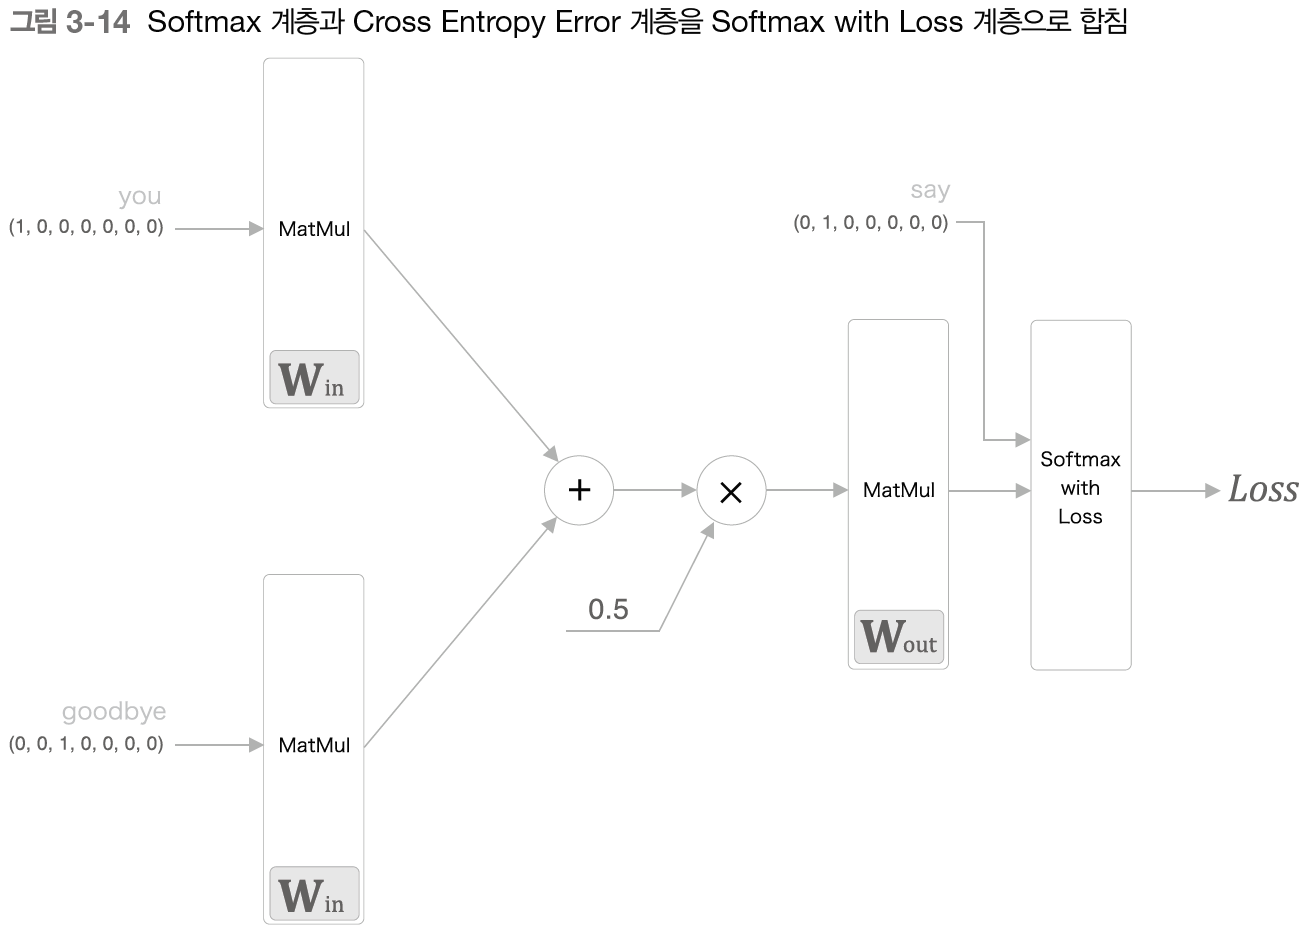

#### 3.2.3 word2vec의 가중치와 분산 표현
#### - 출력 측 가중치 : 단어의 분산 표현이 수직방향으로 저장 but 대중적으로 출력 측의 가중치는 사용하지 않고 입력 측의 가중치만 활용

### 3.3 학습 데이터 준비
#### 3.3.1 맥락과 타깃
#### - 입력 : 맥락 / 정답 : 타깃 단어 -> 신경망에 맥락을 입력했을 때 타깃 단어 출현 확률을 높여야 함
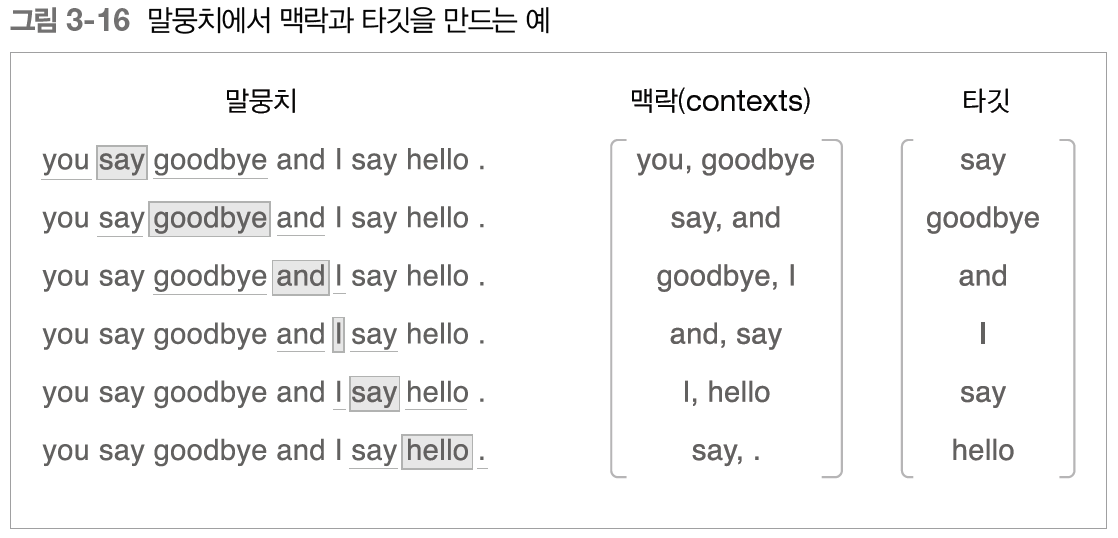

In [22]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [23]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [27]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t == 0:
                continue
            cs.append(corpus[idx+t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

In [28]:
contexts, target = create_contexts_target(corpus, window_size=1)

print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


#### 3.3.2 원핫 표현으로 변환
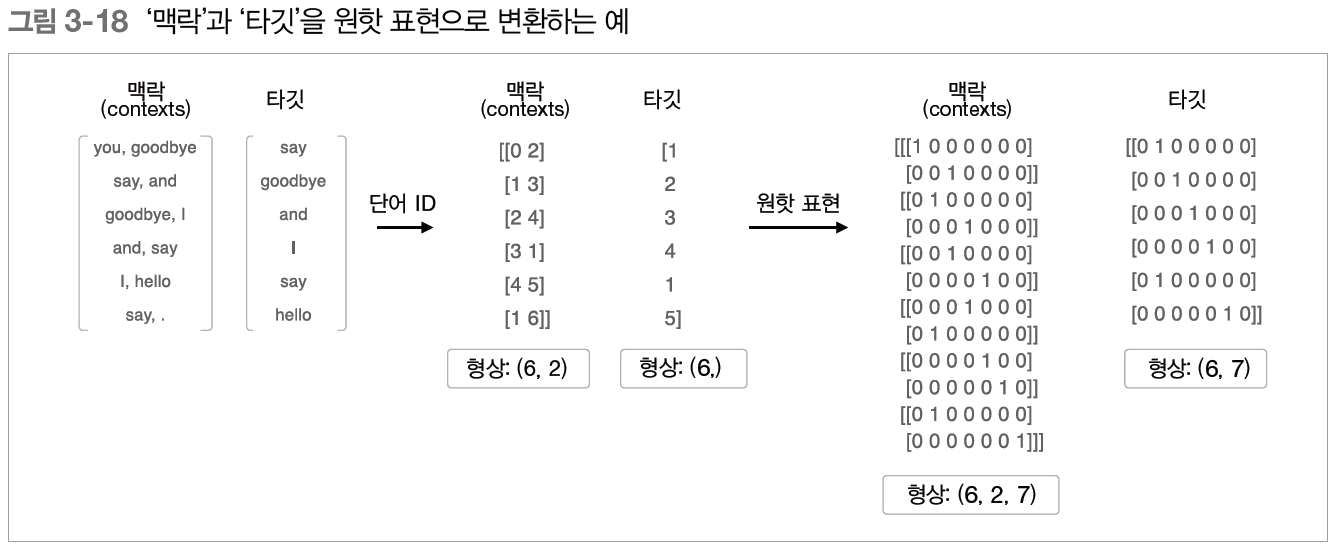

### 3.4 CBOW 모델 구현
### 3.5 word2vec 보충
#### 3.5.1 CBOW 모델과 확률
#### - CBOW : 맥락이 주어졌을 때 타깃 단어가 나타날 확률 -> 조건부 확률
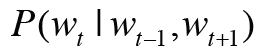
#### - CBOW 손실함수 : negative log likelihood의 평균
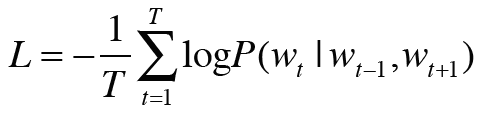

#### 3.5.2 skip-gram 모델
#### - skip-gram : CBOW에서 타깃과 맥락의 역할 역전 -> 타깃 단어로 맥락을 추측
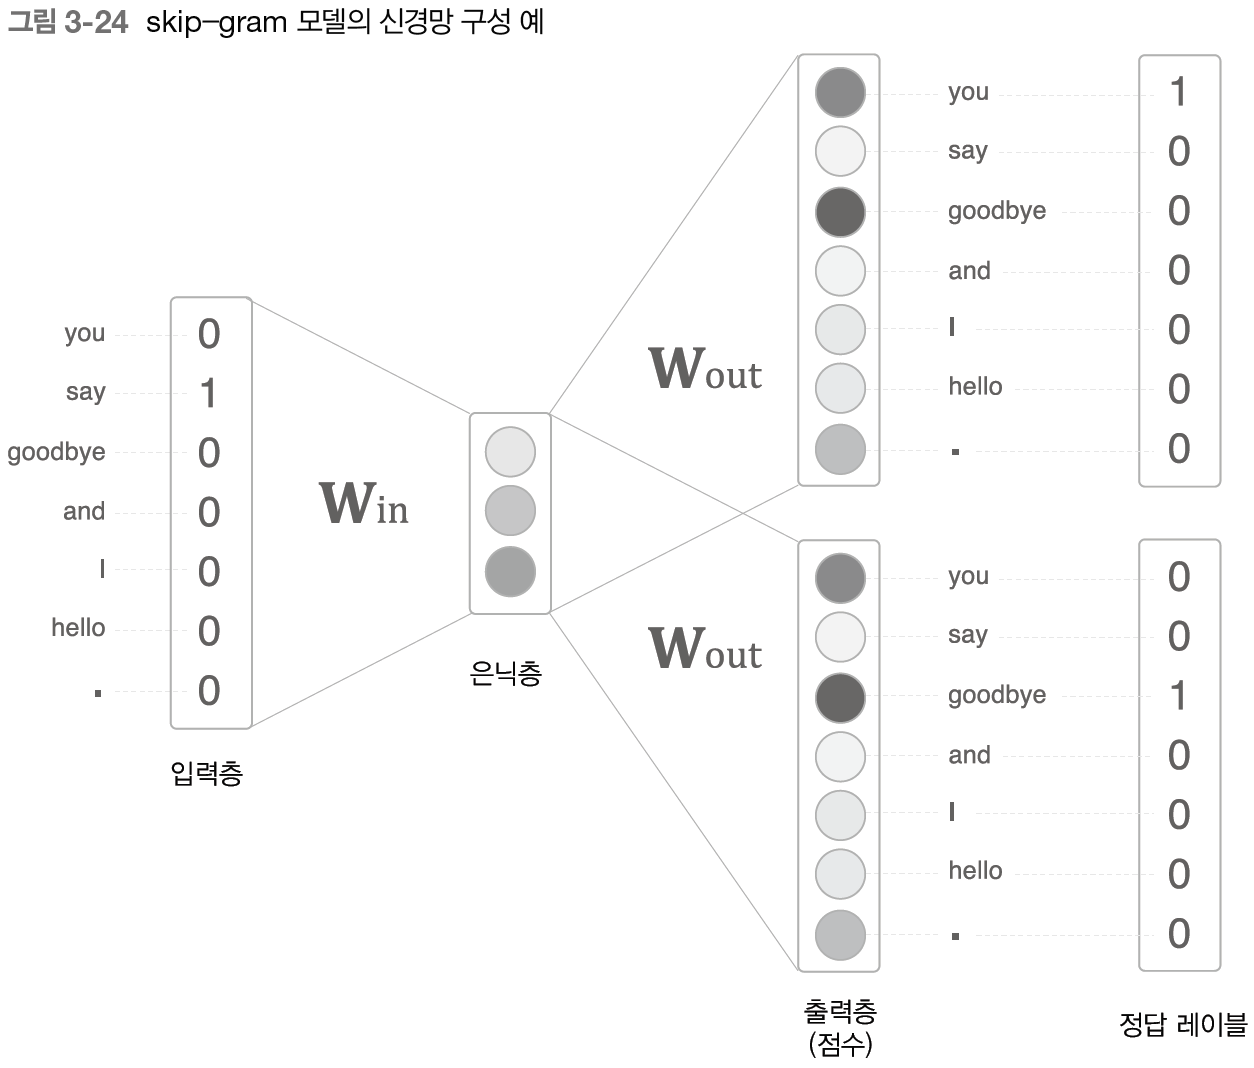
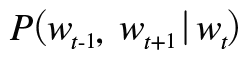
#### - 맥락 단어들 사이에 관련성이 없다고 가정 = 조건부 독립
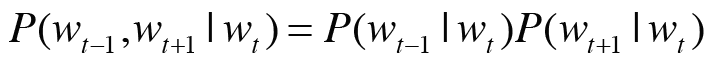
#### - skip-gram 손실함수 : 맥락별 손실 합의 평균 -> 맥락의 수만큼 추측하기 때문에 손실 함수는 각 맥락에서 구한 손실의 총합이어야 함
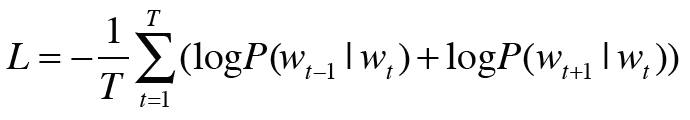
#### - 단어 분산 표현의 정밀도 면에서 skip-gram 모델의 결과가 우수한 경우가 많음 / 말뭉치가 커질수록 저빈도 단어나 유추 문제의 skip-gram 성능이 우수
#### - CBOW가 학습 속도에서 우위 / skip-gram은 손실을 맥락 수만큼 구해야 해서 계산 비용이 커짐

#### 3.5.3 통계 기반 vs 추론 기반
#### - 통계 기반 : 말뭉치의 전체 통계로부터 1회 학습하여 단어의 분산 표현 획득 / 새 단어 등장 시 처음부터 계산 수행 / 단어의 유사성이 인코딩
#### - 추론 기반 : 말뭉치를 일부분씩 여러번 보면서 학습(미니 배치 학습) / 현재 값을 초기값으로 설정하여 매개변수 재학습 가능 / 단어의 유사성, 단어 사이의 패턴까지 인코딩
#### - 실제 단어 유사성 정량 평가에서는 통계 기반, 추론 기반의 우열이 없음
#### - skip-gram과 네거티브 샘플링을 이용한 모델 = 말뭉치 전체의 동시발생 행렬에 특수한 행렬 분해 적용한 결과
#### - Glove : 말뭉치 전체의 통계 정보를 손실함수에 도입해 미니배치 학습 수행